## Analisando dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
dflojas = pd.read_csv("lojas.csv")
dftreino = pd.read_csv("dataset_treino.csv")
dfteste = pd.read_csv("dataset_teste.csv")

In [3]:
dftreino[dftreino.isna().values]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [4]:
dfteste[dfteste.isna().values]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [5]:
# Assumindo que: se tem promocao a loja esta aberta
for idx in dfteste[dfteste.isna().values]['Open'].index:
    dfteste['Open'][idx] = dfteste['Promo'][idx]

In [6]:
dftreino['Date'] = dftreino['Date'].apply(lambda date: pd.to_datetime(date))
dfteste['Date'] = dfteste['Date'].apply(lambda date: pd.to_datetime(date))

In [7]:
def stateholiday(x):
    if x == 0 or x == '0':
        return 30
    elif x == 'a':
        return 60
    elif x == 'b':
        return 90
    elif x == 'c':
        return 120
    else:
        return 150

dftreino['StateHoliday'] = dftreino['StateHoliday'].apply(lambda x: stateholiday(x))
dfteste['StateHoliday'] = dfteste['StateHoliday'].apply(lambda x: stateholiday(x))

In [8]:
dftreino.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,30,1
1,2,5,2015-07-31,6064,625,1,1,30,1
2,3,5,2015-07-31,8314,821,1,1,30,1
3,4,5,2015-07-31,13995,1498,1,1,30,1
4,5,5,2015-07-31,4822,559,1,1,30,1


In [9]:
dfteste.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,30,0
1,2,3,4,2015-09-17,1.0,1,30,0
2,3,7,4,2015-09-17,1.0,1,30,0
3,4,8,4,2015-09-17,1.0,1,30,0
4,5,9,4,2015-09-17,1.0,1,30,0


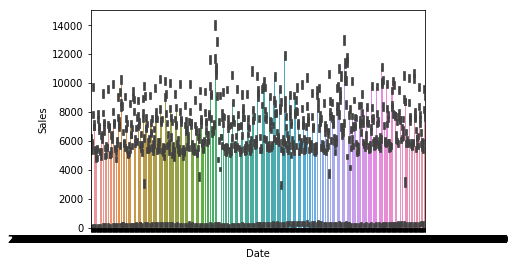

In [10]:
sns.barplot(x = dftreino['Date'], y = dftreino['Sales'], data = dftreino)

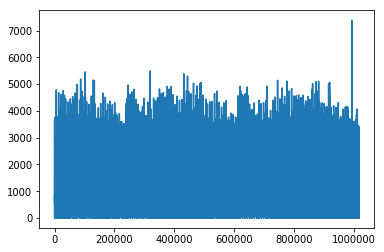

In [11]:
plt.plot(dftreino['Customers'], data = dftreino)

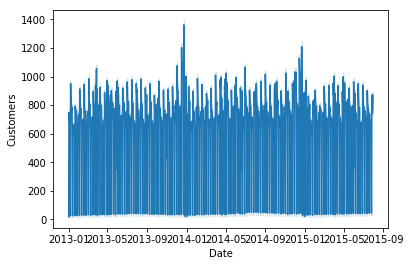

In [12]:
sns.lineplot(x = dftreino['Date'], y = dftreino['Customers'], data = dftreino)

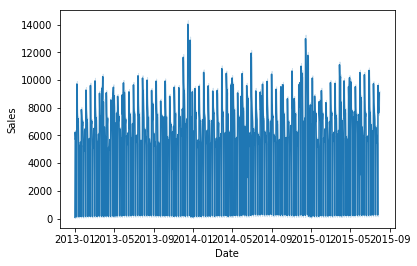

In [13]:
sns.lineplot(x = dftreino['Date'], y = dftreino['Sales'], data = dftreino)

In [14]:
dflojassemnas = dflojas.fillna(-1)

In [15]:
dflojassemnas.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,-1.0,-1.0,-1
4,5,a,a,29910.0,4.0,2015.0,0,-1.0,-1.0,-1


In [16]:
def interval(x):
    if x == 'Feb,May,Aug,Nov':
        return 26
    elif x == 'Jan,Apr,Jul,Oct':
        return 22
    elif x == 'Mar,Jun,Sept,Dec':
        return 30
    else:
        return x
dflojassemnas['PromoInterval'] = dflojassemnas['PromoInterval'].apply(lambda x: interval(x))
dflojassemnas.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,22
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,22
3,4,c,c,620.0,9.0,2009.0,0,-1.0,-1.0,-1
4,5,a,a,29910.0,4.0,2015.0,0,-1.0,-1.0,-1


In [17]:
def storetype(x):
    if x == 0 or x == '0':
        return 100
    elif x == 'a':
        return 200
    elif x == 'b':
        return 300
    elif x == 'c':
        return 400
    else:
        return 500

dflojassemnas['StoreType'] = dflojassemnas['StoreType'].apply(lambda x: storetype(x))
dflojassemnas.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,400,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1
1,2,200,a,570.0,11.0,2007.0,1,13.0,2010.0,22
2,3,200,a,14130.0,12.0,2006.0,1,14.0,2011.0,22
3,4,400,c,620.0,9.0,2009.0,0,-1.0,-1.0,-1
4,5,200,a,29910.0,4.0,2015.0,0,-1.0,-1.0,-1


In [18]:
def assortment(x):
    if x == 0 or x == '0':
        return 10
    elif x == 'a':
        return 20
    elif x == 'b':
        return 30
    elif x == 'c':
        return 40
    else:
        return 50

dflojassemnas['Assortment'] = dflojassemnas['Assortment'].apply(lambda x: assortment(x))
dflojassemnas.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,400,20,1270.0,9.0,2008.0,0,-1.0,-1.0,-1
1,2,200,20,570.0,11.0,2007.0,1,13.0,2010.0,22
2,3,200,20,14130.0,12.0,2006.0,1,14.0,2011.0,22
3,4,400,40,620.0,9.0,2009.0,0,-1.0,-1.0,-1
4,5,200,20,29910.0,4.0,2015.0,0,-1.0,-1.0,-1


In [19]:
dftreinamento = pd.merge(dftreino, dflojassemnas, on='Store', how='inner')
dfcompeticao = pd.merge(dfteste, dflojassemnas, on='Store', how='inner')

In [20]:
dftreinamento['Year'] = dftreinamento['Date'].apply(lambda data: pd.to_datetime(data).year)
dftreinamento['Month'] = dftreinamento['Date'].apply(lambda data: pd.to_datetime(data).month)
dftreinamento['Day'] = dftreinamento['Date'].apply(lambda data: pd.to_datetime(data).day)

In [21]:
dfcompeticao['Year'] = dfcompeticao['Date'].apply(lambda data: pd.to_datetime(data).year)
dfcompeticao['Month'] = dfcompeticao['Date'].apply(lambda data: pd.to_datetime(data).month)
dfcompeticao['Day'] = dfcompeticao['Date'].apply(lambda data: pd.to_datetime(data).day)

In [22]:
dftreinamento.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,30,1,400,...,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,2015,7,31
1,1,4,2015-07-30,5020,546,1,1,30,1,400,...,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,2015,7,30
2,1,3,2015-07-29,4782,523,1,1,30,1,400,...,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,2015,7,29
3,1,2,2015-07-28,5011,560,1,1,30,1,400,...,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,2015,7,28
4,1,1,2015-07-27,6102,612,1,1,30,1,400,...,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,2015,7,27


In [23]:
dfcompeticao.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,30,0,400,20,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,2015,9,17
1,857,1,3,2015-09-16,1.0,1,30,0,400,20,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,2015,9,16
2,1713,1,2,2015-09-15,1.0,1,30,0,400,20,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,2015,9,15
3,2569,1,1,2015-09-14,1.0,1,30,0,400,20,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,2015,9,14
4,3425,1,7,2015-09-13,0.0,0,30,0,400,20,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,2015,9,13


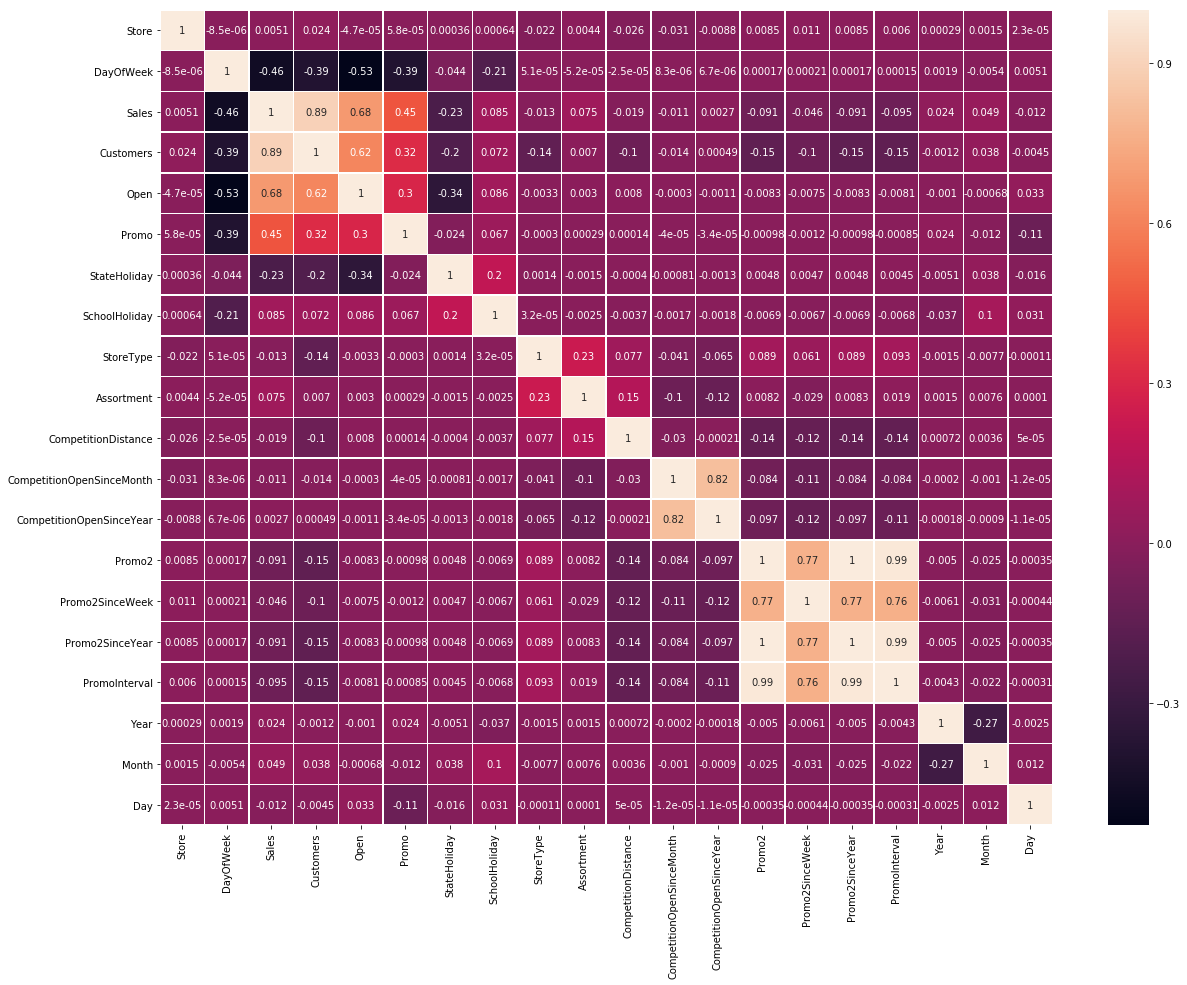

In [51]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(dftreinamento.corr(), annot = True, linewidths=.5, ax=ax)

In [24]:
dftreinamento.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day'],
      dtype='object')

In [52]:
X = dftreinamento[['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'StoreType', 'CompetitionDistance', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']]
y = dftreinamento['Customers']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

lm = LinearRegression()
lm.fit(X_train, y_train)

predicao_customers = lm.predict(X_test)

score = r2_score(y_test, predicao_customers)
score

0.4519921849990268

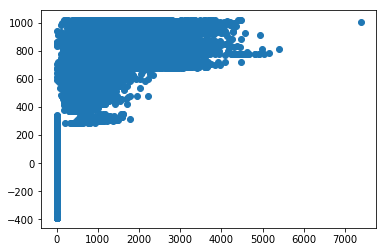

In [54]:
plt.scatter(y_test, predicao_customers)

In [55]:
XComp = dfcompeticao[['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'StoreType', 'CompetitionDistance', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']]
customers = lm.predict(XComp)

In [56]:
customers

array([ 899.12866415,  909.1900451 ,  919.25142605, ...,  697.47685987,
       -171.45866785,  515.47455449])

In [57]:
dfcompeticao['Customers'] = customers
for idx in dfcompeticao[dfcompeticao['Customers'] < 0].index:
    dfcompeticao['Customers'].iloc[idx] = 0

In [58]:
dfcompeticao[dfcompeticao['Customers'] < 0]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Customers


In [59]:
dfcompeticao.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Customers
0,1,1,4,2015-09-17,1.0,1,30,0,400,20,...,9.0,2008.0,0,-1.0,-1.0,-1,2015,9,17,899.128664
1,857,1,3,2015-09-16,1.0,1,30,0,400,20,...,9.0,2008.0,0,-1.0,-1.0,-1,2015,9,16,909.190045
2,1713,1,2,2015-09-15,1.0,1,30,0,400,20,...,9.0,2008.0,0,-1.0,-1.0,-1,2015,9,15,919.251426
3,2569,1,1,2015-09-14,1.0,1,30,0,400,20,...,9.0,2008.0,0,-1.0,-1.0,-1,2015,9,14,929.312807
4,3425,1,7,2015-09-13,0.0,0,30,0,400,20,...,9.0,2008.0,0,-1.0,-1.0,-1,2015,9,13,60.377279


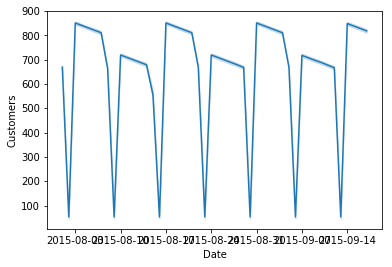

In [60]:
sns.lineplot(x = dfcompeticao['Date'], y = dfcompeticao['Customers'], data = dfcompeticao)

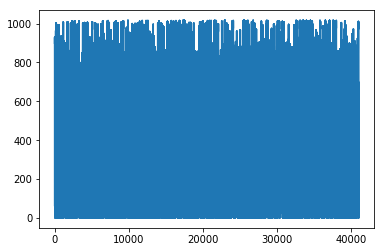

In [61]:
plt.plot(dfcompeticao['Customers'], data = dfcompeticao)

In [64]:
dfcompeticao['Customers'] = dfcompeticao['Customers'].mean()

In [65]:
X2 = dftreinamento[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day']]
y2 = dftreinamento['Sales']

In [66]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25)

lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)

predicao2 = lm2.predict(X2_test)

score2 = r2_score(y2_test, predicao2)
score2

0.8690099584614108

In [67]:
X2Comp = dfcompeticao[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day']]

In [68]:
sales = lm2.predict(X2Comp)
sales

array([7100.73071054, 7166.68113356, 7232.63155659, ..., 7711.35616797,
       4676.02487357, 6122.52026147])

In [69]:
dfPredito = pd.DataFrame(sales)
dfPredito.index = np.arange(1, len(dfPredito)+1)
dfPredito.to_csv('linearregression_customerspredict_mean.csv')